# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame_height, frame_width = frame.shape[:2]  # Unpack the first two elements (height, width)
        max_x = frame_width - 1  # Indexing starts from 0, so max_x is width - 1
        max_y = frame_height - 1

        left_spacing = int((max_x - 270)/2)
        right_spacing = max_x - left_spacing
        cropped_frame = frame[:, left_spacing:right_spacing]
        # Make detections
        image, results = mediapipe_detection(cropped_frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
# FACEMESH_TESSELATION

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(cropped_frame, results)

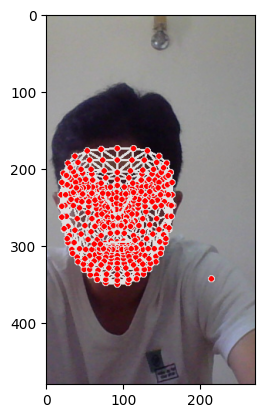

In [12]:
plt.imshow(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [8]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks 
else np.zeros(1404)


SyntaxError: expected ':' (1900910733.py, line 2)

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.48530856,  0.46520388, -2.55942154, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.48530856,  0.46520388, -2.55942154, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(["DauMat", "DauBung", "DauTay", "DauChan", "DauTai", "BenhTat", "Chua", "QuaBuoi",
        "QuaChanh", "QuaCam", "QuaChomChom", "QuaLe", "QuaNho", "QuaSauRieng", "Chao",
        "TamBiet", "GhenTi", "Nham", "Mach", "NanNi", "Keu", "Hon"])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [26]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [43]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [44]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Wait for 'k' to start the action
        while True:
            cv2.putText(image, 'Press "k" to start collecting frames for {}'.format(action), (15, 12),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', image)
            if cv2.waitKey(0) & 0xFF == ord('k'):
                break  # Exit the 'k' waiting loop
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame_height, frame_width = frame.shape[:2]  # Unpack the first two elements (height, width)
                max_x = frame_width - 1  # Indexing starts from 0, so max_x is width - 1
                max_y = frame_height - 1

                left_spacing = int((max_x - 270)/2)
                right_spacing = max_x - left_spacing
                cropped_frame = frame[:, left_spacing:right_spacing]
                # Make detections
                image, results = mediapipe_detection(cropped_frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [45]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'DauMat': 0,
 'DauBung': 1,
 'DauTay': 2,
 'DauChan': 3,
 'DauTai': 4,
 'BenhTat': 5,
 'Chua': 6,
 'QuaBuoi': 7,
 'QuaChanh': 8,
 'QuaCam': 9,
 'QuaChomChom': 10,
 'QuaLe': 11,
 'QuaNho': 12,
 'QuaSauRieng': 13,
 'Chao': 14,
 'TamBiet': 15,
 'GhenTi': 16,
 'Nham': 17,
 'Mach': 18,
 'NanNi': 19,
 'Keu': 20,
 'Hon': 21}

In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(660, 30, 1662)

In [29]:
np.array(labels).shape

(660,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(660, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(33, 22)

# 7. Build and Train LSTM Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [16]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [17]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
res = [.7, 0.2, 0.1]

In [40]:
actions[np.argmax(res)]

'DauMat'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
20/20 [==============================] - 4s 60ms/step - loss: 3.3035 - categorical_accuracy: 0.0319
Epoch 2/100
20/20 [==============================] - 1s 58ms/step - loss: 3.0238 - categorical_accuracy: 0.0893
Epoch 3/100
20/20 [==============================] - 1s 67ms/step - loss: 2.9805 - categorical_accuracy: 0.0590
Epoch 4/100
20/20 [==============================] - 1s 60ms/step - loss: 3.0049 - categorical_accuracy: 0.0781
Epoch 5/100
20/20 [==============================] - 1s 58ms/step - loss: 2.9095 - categorical_accuracy: 0.0877
Epoch 6/100
20/20 [==============================] - 1s 67ms/step - loss: 2.6486 - categorical_accuracy: 0.1372
Epoch 7/100
20/20 [==============================] - 1s 63ms/step - loss: 2.4526 - categorical_accuracy: 0.1627
Epoch 8/100
20/20 [==============================] - 1s 64ms/step - loss: 2.1269 - categorical_accuracy: 0.2568
Epoch 9/100
20/20 [==============================] - 1s 65ms/step - loss: 1.9852 - categorical_accuracy:

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 22)                726       
                                                                 
Total params: 597,302
Trainable params: 597,302
Non-trai

# 8. Make Predictions

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[4])]

'DauChan'

In [46]:
actions[np.argmax(y_test[4])]

'DauChan'

# 9. Save Weights

In [47]:
model.save('action.h5')

In [32]:
del model

In [18]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[31,  0],
        [ 0,  2]],

       [[31,  0],
        [ 0,  2]],

       [[28,  0],
        [ 0,  5]],

       [[29,  0],
        [ 0,  4]],

       [[32,  0],
        [ 0,  1]],

       [[32,  0],
        [ 0,  1]],

       [[32,  1],
        [ 0,  0]],

       [[31,  0],
        [ 1,  1]],

       [[31,  0],
        [ 0,  2]],

       [[32,  0],
        [ 1,  0]],

       [[30,  0],
        [ 0,  3]],

       [[32,  0],
        [ 0,  1]],

       [[31,  0],
        [ 0,  2]],

       [[31,  0],
        [ 0,  2]],

       [[32,  0],
        [ 0,  1]],

       [[32,  0],
        [ 0,  1]],

       [[31,  0],
        [ 0,  2]],

       [[32,  0],
        [ 1,  0]],

       [[31,  2],
        [ 0,  0]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.9090909090909091

# 11. Test in Real Time

In [22]:
colors = [
    (0, 0, 0),  # Black (full red, but technically not visible)
    (5, 0, 0),
    (10, 0, 0),
    (15, 0, 0),
    (20, 0, 0),
    (25, 0, 0),
    (30, 0, 0),
    (35, 0, 0),
    (40, 0, 0),
    (45, 0, 0),
    (50, 0, 0),
    (55, 0, 0),
    (60, 0, 0),
    (65, 0, 0),
    (70, 0, 0),
    (75, 0, 0),
    (80, 0, 0),
    (85, 0, 0),
    (90, 0, 0),
    (95, 0, 0),
    (100, 0, 0),  # Darkest visible red
    (255, 0, 0),  # Full red
]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [21]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [59]:
sequence.reverse()

In [60]:
len(sequence)

30

In [61]:
sequence.append('def')

In [62]:
sequence.reverse()

In [63]:
sequence[-30:]

[array([ 0.41906431,  0.8560245 , -1.71773648, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.41914099,  0.85602558, -2.21776509, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43071342,  0.84898335, -2.19956255, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43708569,  0.84533185, -2.30040956, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44084492,  0.83276057, -2.28367853, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44368082,  0.82642329, -2.23016787, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44722065,  0.82259256, -2.21815324, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44930553,  0.81847262, -2.25129366, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.45046431,  0.81364083, -2.2106204 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.45594808,  0.81114584, -2.19987941, ...,  0.        ,
         0.        ,  0.  

In [35]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame_height, frame_width = frame.shape[:2]  # Unpack the first two elements (height, width)
        max_x = frame_width - 1  # Indexing starts from 0, so max_x is width - 1
        max_y = frame_height - 1

        left_spacing = int((max_x - 270)/2)
        right_spacing = max_x - left_spacing
        cropped_frame = frame[:, left_spacing:right_spacing]
        # Make detections
        image, results = mediapipe_detection(cropped_frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [30]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)